# Hayward Fault Sequence Simulator

### By Yair Franco
##### Started April 24, 2024

Note: this code requires Python v3.10.0 or higher to run

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

## Time Model

Based on Lienkaemper, 2010: https://doi.org/10.1785/0120090129

In [2]:
present = datetime.now().year #or manual input to simulate what this code would do in the future

# dates = [1868, 1725, 1629, 1475, 1317, 1134, 957, 822, 660, 444, 247, 91]
# errors = [0, 38, 46, 47, 44, 77, 21, 40, 10, 42, 40, 40]

dates = [91, 247, 444, 660, 822, 957, 1134, 1317, 1475, 1629, 1725, 1868]
errors = [40, 40, 42,10, 40, 21, 77, 44, 47, 46, 38, 0]

In [3]:
timeset = []

for i in range(len(dates)):
    r = [dates[i]-errors[i],dates[i],dates[i]+errors[i]]
    timeset.append(r)

print(timeset)

[[51, 91, 131], [207, 247, 287], [402, 444, 486], [650, 660, 670], [782, 822, 862], [936, 957, 978], [1057, 1134, 1211], [1273, 1317, 1361], [1428, 1475, 1522], [1583, 1629, 1675], [1687, 1725, 1763], [1868, 1868, 1868]]


### Create fake sequences to test

Values to test: 

Lienkaemper, 2010 gives RI of 161 and SD of 65

Parsons, 2008 (https://doi.org/10.1029/2008GL035887) gives an RI of 210 years and coeff. of var. 0.6 (SD = 126)

Parsons, 2012 (https://doi.org/10.1029/2012GL052275) gives an RI of 211, -SD = 95, +SD = 173

In [4]:
ri = 161
sd = 65


for i in range(10):
    startyear = dates[0] + np.random.randint(-errors[0],errors[0])
    fakeseq = [startyear]

    for j in range(len(dates)-1):
        nextevent = fakeseq[j] + ri + np.random.randint(-sd,sd)
        fakeseq.append(nextevent)

    #print(fakeseq)
    print(f'Sequence {i+1} puts the 1868 earthquake in the year {fakeseq[-1]} instead.')

Sequence 1 puts the 1868 earthquake in the year 1781 instead.
Sequence 2 puts the 1868 earthquake in the year 1780 instead.
Sequence 3 puts the 1868 earthquake in the year 1840 instead.
Sequence 4 puts the 1868 earthquake in the year 1762 instead.
Sequence 5 puts the 1868 earthquake in the year 1860 instead.
Sequence 6 puts the 1868 earthquake in the year 1958 instead.
Sequence 7 puts the 1868 earthquake in the year 2002 instead.
Sequence 8 puts the 1868 earthquake in the year 1785 instead.
Sequence 9 puts the 1868 earthquake in the year 2050 instead.
Sequence 10 puts the 1868 earthquake in the year 1885 instead.


Let's count how long it takes for fake sequences to place the 1868 earthquake on the correct year.

In [5]:
success = False
att = 0

while success == False:
    att += 1
    #print(att)
    startyear = dates[0] + np.random.randint(-errors[0],errors[0])
    fakeseq = [startyear]

    for j in range(len(dates)):
        nextevent = fakeseq[j] + ri + np.random.randint(-sd,sd)
        fakeseq.append(nextevent)

    #print(fakeseq)
    success = fakeseq[-2] == dates[-1] #is the 12th generated earthquake in 1868?

print(f'It took {att} tries to generate a sequence placing the 1868 earthquake on the correct year')
print(f'This sequence places the next Hayward earthquake in the year {fakeseq[-1]}')
print(f'Successful sequence: {fakeseq}')
print(f'Lienkaemper sequence: {dates}')

It took 499 tries to generate a sequence placing the 1868 earthquake on the correct year
This sequence places the next Hayward earthquake in the year 1991
Successful sequence: [97, 253, 388, 596, 763, 979, 1083, 1239, 1386, 1586, 1748, 1868, 1991]
Lienkaemper sequence: [91, 247, 444, 660, 822, 957, 1134, 1317, 1475, 1629, 1725, 1868]


Let's add another constraint: the 13th earthquake generated should be after the present (since there hasn't been one since 1868).

In [6]:
ri = 161
sd = 65
success = False
att = 0

while success == False:
    att += 1
    #print(att)
    startyear = dates[0] + np.random.randint(-errors[0],errors[0])
    fakeseq = [startyear]

    for j in range(len(dates)):
        nextevent = fakeseq[j] + ri + np.random.randint(-sd,sd)
        fakeseq.append(nextevent)

    #if fakeseq[-2] == dates[0] or fakeseq[-1] == present: print(fakeseq[-2],fakeseq[-1])

    if fakeseq[-2] == dates[-1] and fakeseq[-1] > present:
        success = True



print(f'It took {att} tries to generate a sequence placing the 1868 earthquake on the correct year')
print(f'This sequence places the next Hayward earthquake in the year {fakeseq[-1]}')
print(f'Successful sequence: {fakeseq}') 
print(f'Lienkaemper sequence: {dates}')

It took 174 tries to generate a sequence placing the 1868 earthquake on the correct year
This sequence places the next Hayward earthquake in the year 2030
Successful sequence: [73, 186, 309, 493, 706, 818, 1015, 1215, 1323, 1508, 1643, 1868, 2030]
Lienkaemper sequence: [91, 247, 444, 660, 822, 957, 1134, 1317, 1475, 1629, 1725, 1868]


This function returns the recurrence intervals for any given sequence. It'll be useful later

In [7]:
def calcRI(seq,getMean=0): #setting get mean to 1 will calculate RI mean and sd for the given sequence
    ri = []

    for i in range(len(seq)-1):
        interval = seq[i+1] - seq[i]
        ri.append(interval)

    match getMean:
        case 0:
            return ri

        case 1:
            mean = int(np.mean(ri))
            sd = int(np.std(ri))
            return ri, mean, sd
        
    # if getMean == 0: #for python versions older than 3.10, replace 'match' code with this
    #     return ri
    # elif getMean == 1:
    #     mean = int(np.mean(ri))
        # sd = int(np.std(ri))
    #     return ri, mean, sd

Now let's use Numpy's Gaussian RNG to favor the mean Lienkaemper dates, instead of using the average RI for the whole sequence. Additionally, let's consider all sequences placing the next earthquake before 2024 as fails (since the next earthquake has not happened yet).

Obviously, this will always return a sequence with an earthquake in 1868, since we know this event's exact date.

Since we do not know when the next earthquake will happen, we'll use the calculate the mean and SD of the RIs for our generated sequence, and make a guess based on the results.

In [8]:
success = False
att = 0

while success == False:
    att += 1
    seq = []

    for j in range(len(dates)):
        event = int(np.random.normal(dates[j],errors[j])) #random guess assuming normal distributions of given standard deviations
        seq.append(event)

    mean, sd = calcRI(seq,1)[1], calcRI(seq,1)[2] #mean RI for all events in this synthetic sequence
    nextevent = seq[-1] + int(np.random.normal(mean, sd))
    seq.append(nextevent)

    if seq[-1] > present:
        success = True #is the 12th generated earthquake in 1868? Is the next one in the future?

print(f'Attempt count: {att}')
print(f'This sequence places the next Hayward earthquake in the year {seq[-1]}')
print(f'This sequence: {seq}')
print(f'Lienkaemper sequence: {dates}')

Attempt count: 1
This sequence places the next Hayward earthquake in the year 2164
This sequence: [76, 248, 508, 673, 801, 976, 1048, 1332, 1517, 1649, 1738, 1868, 2164]
Lienkaemper sequence: [91, 247, 444, 660, 822, 957, 1134, 1317, 1475, 1629, 1725, 1868]


In [70]:
nextdates = []
s = 0
sequences = 1000
means = []
sds = []
sq = []

for i in range(sequences): #initialize sequences
    success = False
    att = 0

    while success == False:
        att += 1
        seq = []

        for j in range(len(dates)-1):
            add = False

            if j == 0: #set first event. No need for it to have certain bounds
                event = int(np.random.normal(dates[j],errors[j])) #random guess assuming normal distributions of given standard deviations
            elif j > 0:
                while add == False:
                    event = int(np.random.normal(dates[j],errors[j]))
                    # print(f'Adding event {j}: Year {event} Previous = {seq[j-1]} Fail? {event < seq[-1]}')
                    if event < seq[j-1]: #avoids events happening before the previous ones
                        continue
                    elif event >= seq[j-1]:
                        add = True
            seq.append(event)

        seq.append(dates[-1]) #add 1686 earthquake manually

        meanRI, sdRI = calcRI(seq,1)[1], calcRI(seq,1)[2] #mean RI for all events in this synthetic sequence

        # means.append(mean)
        # sds.append(sd)

        nextevent = seq[-1] + int(np.random.normal(meanRI, sdRI))
        seq.append(nextevent)

        sq.append(seq)
        nextdates.append(seq[-1])
        success = True

print(nextdates)

[2090, 1998, 2071, 1926, 2085, 1989, 1949, 1970, 2053, 1885, 2007, 1966, 1970, 2085, 2081, 2042, 2127, 1998, 2032, 2021, 2136, 1972, 2046, 2011, 2065, 2031, 2032, 2067, 2012, 1882, 1978, 2041, 2044, 1986, 2153, 2010, 2063, 1960, 2080, 2057, 2089, 2002, 1938, 2034, 2036, 2038, 2110, 2028, 1977, 1911, 2090, 1943, 2011, 2005, 2028, 2061, 1920, 2067, 2098, 1955, 1974, 1994, 2042, 2121, 2129, 2197, 2034, 2057, 2110, 2096, 2011, 2073, 2055, 1945, 1989, 1993, 1841, 1959, 1935, 2022, 1994, 2114, 2087, 1994, 2059, 2086, 2075, 2017, 2071, 1955, 2013, 2029, 1993, 1880, 2047, 2005, 2094, 2106, 1927, 2135, 2071, 2100, 1977, 1940, 1998, 2010, 2179, 2096, 1971, 2042, 2065, 2017, 2018, 2056, 2024, 2027, 1978, 1943, 2087, 2005, 2012, 2122, 2000, 1945, 1905, 2001, 2063, 1933, 2065, 2058, 2017, 2058, 2051, 1967, 1994, 2007, 2153, 2086, 2039, 1937, 2029, 2020, 2064, 1991, 1976, 2099, 2047, 1992, 1985, 2054, 2106, 2070, 1937, 2048, 2074, 2001, 2086, 2077, 2083, 2072, 1994, 1999, 1987, 2053, 2003, 2008, 197

Let's visualize the sequences we've generated. They should look like a figure in Lienkaemper, 2010.

In [105]:
ev[i] for ev in sq

{'bodies': [<matplotlib.collections.PolyCollection at 0x1d2fa7dd2b0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1d2fa77fda0>,
 'cmins': <matplotlib.collections.LineCollection at 0x1d2f9170a40>,
 'cbars': <matplotlib.collections.LineCollection at 0x1d2fa86c4d0>}

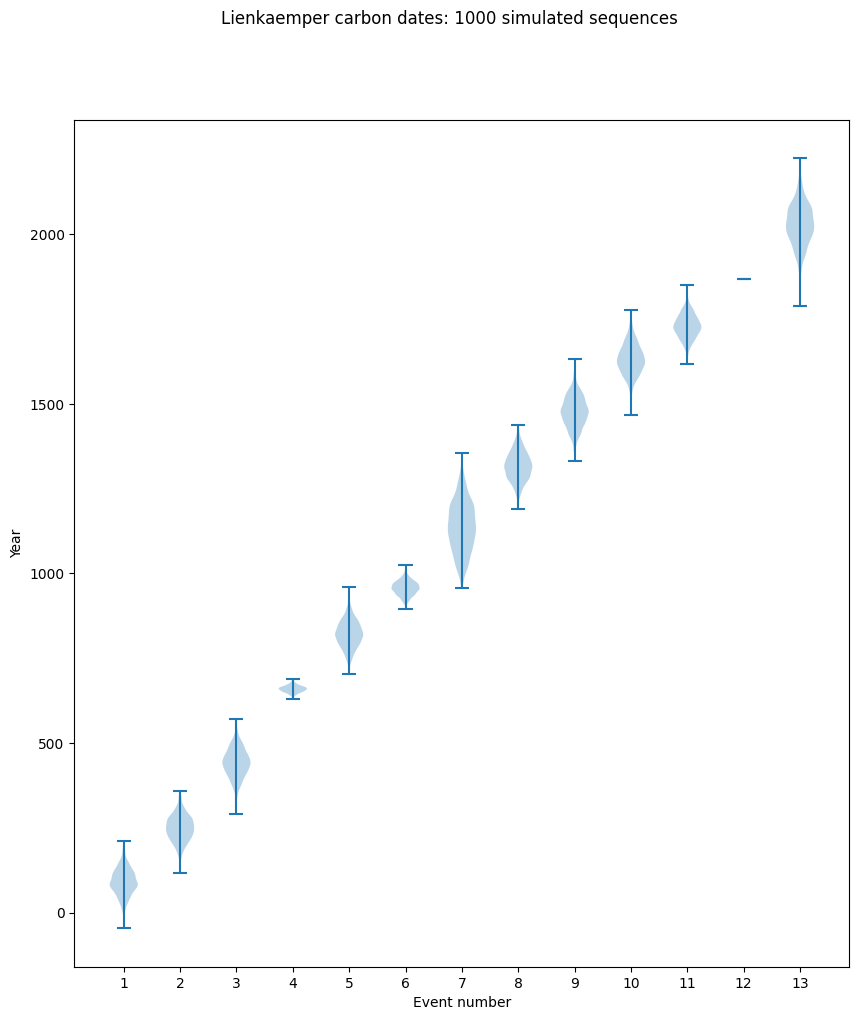

In [108]:
x = np.arange(1,len(seq)+1,1)

fig, ax = plt.subplots(figsize=(10,11))

fig.suptitle(f'Lienkaemper carbon dates: {len(sq)} simulated sequences')

ax.set_xlabel(f"Event number")
ax.set_ylabel(f'Year')
ax.set_xticks(x)
# ax.scatter(x,sq[0], s = 2, marker='.',color = 'red')

by_event = []
for i in range(len(x)):
    by_event.append([ev[i] for ev in sq])

ax.violinplot(by_event)
# for l in sq:
#     ax.scatter(x,l, s = 1, marker='.',color = 'red')

Just for fun, let's make a histogram of the years this simulation gives for the next earthquake.

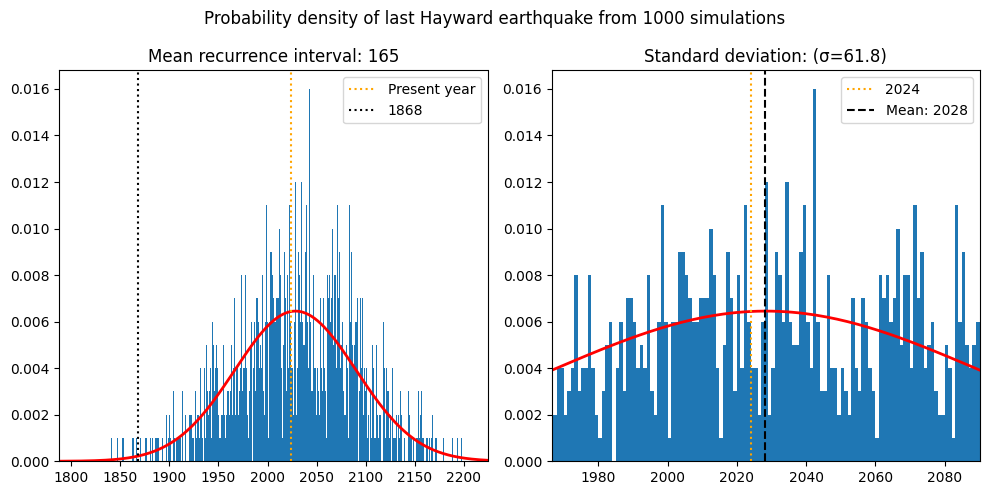

In [71]:
h = np.array([x[-1] for x in sq])
binsize = max(h) - min(h)
sigma = np.std(h)
mu = np.mean(h)

fig, ax = plt.subplots(1, 2, tight_layout=True, figsize=(10,5))

fig.suptitle(f'Probability density of last Hayward earthquake from {len(h)} simulations')

count, bins, ignored = ax[0].hist(h, binsize, density=True) #plot main hist
gauss = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp((-1/2)*((bins-mu)/sigma)**2)

ax[0].set_title(f"Mean recurrence interval: {meanRI}")
ax[1].set_title(f"Standard deviation: (σ={round(sigma,1)})")

ax[0].plot(bins, gauss,
         linewidth=2, color='r')

ax[0].set_xlim(min(h),max(h))
ax[0].axvline(present,linestyle=':',color='orange',label='Present year')
ax[0].axvline(1868,linestyle=':',color='black',label='1868')
ax[0].legend()


ax[1].hist(h, binsize, density=True) #plot sub hist
ax[1].plot(bins, gauss,
         linewidth=2, color='r')

ax[1].axvline(2024,linestyle=':',color='orange',label='2024')
ax[1].axvline(round(mu),linestyle='--',color='black',label=f'Mean: {round(mu)}')

ax[1].set_xlim(mu-sigma,mu+sigma)
ax[1].legend()
#ax[1].set_xlim(2000,2100)

plt.show()

In [56]:
[x[-2] for x in sq]

[1868, 1868, 1868, 1868, 1868, 1868, 1868, 1868, 1868, 1868]

In [72]:
sq

[[77, 201, 374, 655, 804, 983, 1067, 1310, 1504, 1653, 1716, 1868, 2090],
 [151, 269, 396, 647, 792, 899, 1155, 1285, 1418, 1538, 1738, 1868, 1998],
 [67, 202, 457, 673, 805, 936, 1233, 1342, 1520, 1658, 1736, 1868, 2071],
 [112, 258, 415, 644, 758, 932, 1022, 1289, 1507, 1657, 1725, 1868, 1926],
 [58, 260, 357, 665, 839, 941, 1175, 1373, 1521, 1663, 1727, 1868, 2085],
 [104, 254, 399, 667, 810, 945, 1153, 1337, 1534, 1589, 1827, 1868, 1989],
 [66, 289, 461, 650, 873, 951, 1189, 1377, 1510, 1616, 1636, 1868, 1949],
 [114, 316, 534, 656, 824, 992, 1222, 1235, 1583, 1654, 1771, 1868, 1970],
 [57, 262, 515, 665, 865, 1004, 1168, 1352, 1426, 1601, 1730, 1868, 2053],
 [126, 269, 395, 654, 787, 946, 1026, 1308, 1484, 1693, 1719, 1868, 1885],
 [47, 194, 425, 665, 892, 961, 1253, 1345, 1522, 1777, 1837, 1868, 2007],
 [112, 236, 430, 643, 869, 937, 1105, 1271, 1459, 1570, 1738, 1868, 1966],
 [78, 271, 352, 650, 846, 921, 1167, 1287, 1377, 1607, 1708, 1868, 1970],
 [146, 282, 353, 655, 843, 926,

In [95]:
all_data = [np.random.normal(0, std, 100) for std in range(6, 10)]
all_data

[array([  2.99762239,   8.011812  ,  -6.01848741,   4.37255655,
         -0.11862825,  -8.10836116,  -2.73458742,   7.4679706 ,
          4.28287877,   4.19757842,  -0.94768922,   5.81664707,
        -11.97034131,  -2.31012837,  -0.44318967,  -1.51129778,
          1.51681162,  -1.20100921,  -6.27752541,   0.02207511,
          7.7452821 ,  -3.41690868,  -4.48330548, -12.4532819 ,
          8.02019028,  -6.93296589,   1.93854053,   1.4899194 ,
         -4.69255588,   2.4407336 ,   0.12306564,  -3.25147257,
          9.76447296,   6.7153367 ,   2.20289392,   4.44924813,
          3.22498843,   2.12964636,  -2.77838484,  -6.43735863,
          1.80820656,   2.35868733,  10.35136865,  -2.95976149,
         -7.51156462,  -0.80573119,  -2.07459344,   3.9389142 ,
          5.78785791,   2.36815175,  -8.37410181,   2.36714644,
         -2.02335227,   2.2817394 ,   3.59186711,  -0.02218723,
          1.560713  ,   1.67299789,  -2.7131627 ,   1.41225411,
          7.10138427,  -0.71658092,   0.